## Titanic Data Description

**VARIABLE DESCRIPTIONS:**
* survival        **Survival (0 = No; 1 = Yes)**
* pclass          **Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)**
* name            **Name**
* sex             **Sex**
* age             **Age**
* sibsp           **Number of Siblings/Spouses Aboard**
* parch           **Number of Parents/Children Aboard**
* ticket          **Ticket Number**
* fare            **Passenger Fare**
* cabin           **Cabin** 
* embarked        **Port of Embarkation**
                (C = Cherbourg; Q = Queenstown; S = Southampton)

**SPECIAL NOTES:**

* Pclass is a proxy for socio-economic status (SES)
   * 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

* Age is in Years; Fractional if Age less than One (1)
  * If the Age is Estimated, it is in the form xx.5

**With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.** 

1. *Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic*. 

2. *Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)*.

3. *Parent:   Mother or Father of Passenger Aboard Titanic*.

4. *Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic*. 

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.


In [1]:
%matplotlib inline
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import pearsonr
from pylab import *
# Description of how the Titanic Sank: 
HTML(
'<iframe width="560" height="315" src="https://www.youtube.com/embed/FSGeskFzE0s"frameborder="0" allowfullscreen></iframe>')

## Data Wrangling for Male, Female Survivors and Deaths

In [2]:
#inspect the titatic-data set. 
titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head() 

#filled NaN values with zeror for passangers. 
titanic_df = titanic_df.fillna(value=0) 

#functions 
def gender_survial(gender,survival):
    """gender must be of type(str) of either gender
       surtival must be of type(int) of either 0 or 1"""
    return titanic_df[((titanic_df['Sex']) == gender) & (titanic_df['Survived'] == survival)]

def passanger_class(data,pclass): 
    """data must be of type(DataFrame) of Titanic DF
       pclass must be of type(int):= [1,2,3]"""
    return data[data['Pclass'] == pclass]

def series(data,column):
    """returns a series of the dataframe with its respective column.
       Column can be of type(str),type(int) and type(float)."""
    return data[column]

def embarked_survivors(survived,embarked): 
    """This function returns a dataframe of
       passangers who either died of survived and where they embarked"""
    return titanic_df[(titanic_df['Survived'] == survived) & (titanic_df['Embarked'] == embarked)]

def class_survivors_victims(survived,pclass):
    """This buids an overall relationship of class who survived and were victims"""
    return titanic_df[(titanic_df['Survived'] == survived) & (titanic_df['Pclass'] == pclass)]

#survived and victim class passangers
first_class_survivors = class_survivors_victims(1,1)
first_class_victims = class_survivors_victims(0,1)
second_class_survivors = class_survivors_victims(1,2)
second_class_victims = class_survivors_victims(0,2)
third_class_survivors = class_survivors_victims(1,3)
third_class_victims = class_survivors_victims(0,3)

#merge by victim and survivors by class 
first_class_merge = first_class_survivors.merge(first_class_victims, how='outer')
second_class_merge = second_class_survivors.merge(second_class_victims,how='outer')
third_class_merge = third_class_survivors.merge(third_class_victims,how="outer")

#survived male passangers & female passangers
male_survived_df = gender_survial('male',1)
female_survived_df = gender_survial('female',1)

#first class, second class and third class males who survived 
first_class_survived_m = passanger_class(male_survived_df,1)
second_class_survived_m= passanger_class(male_survived_df,2)
third_class_survived_m = passanger_class(male_survived_df,3)

#first class, second class and third class females who survived
first_class_survived_f = passanger_class(female_survived_df,1)
second_class_survived_f= passanger_class(female_survived_df,2)
third_class_survived_f = passanger_class(female_survived_df,3)

#series of first,second and third passanger class survivor male
first_class = series(first_class_survived_m,'Pclass') #f-class series
second_class = series(second_class_survived_m,'Pclass')#s-class series
third_class = series(third_class_survived_m,'Pclass') #t-class series

#series of first,second and third passanger class survivor female
first_class_f = series(first_class_survived_f,'Pclass') #f-class series
second_class_f = series(second_class_survived_f,'Pclass') #s-class series
third_class_f = series(third_class_survived_f,'Pclass') #t-class series

#deaths of male and female passangers
male_deaths = gender_survial('male',0)
female_deaths = gender_survial('female',0)

#first class,second and third males who died
first_class_death_m = passanger_class(male_deaths,1)
second_class_death_m = passanger_class(male_deaths,2)
third_class_death_m = passanger_class(male_deaths,3)

#first class,second and third females who died
first_class_death_f = passanger_class(female_deaths,1)
second_class_death_f= passanger_class(female_deaths,2)
third_class_death_f = passanger_class(female_deaths,3)

#series of first,second and thrid class male deaths
first_class_death_males  = series(first_class_death_m,'Pclass') #f-class series
second_class_death_males = series(second_class_death_m,'Pclass')#s-class series
third_class_death_males  = series(third_class_death_m,'Pclass') #t-class series

#series of first,second and third passanger class female deaths
first_class_death_females  = series(first_class_death_f,'Pclass') #f-class series
second_class_death_females = series(second_class_death_f,'Pclass')#s-class series
third_class_death_females  = series(third_class_death_f,'Pclass') #t-class series

## Described Metrics for Titanic passangers

In [39]:
#Describe some metrics of overall passangers
titanic_df.describe()

#population of class first,second and third
#Survivors 
# print len(first_class_survivors)
# print len(second_class_survivors)
# print len(third_class_survivors)
# #Victims
# print len(first_class_victims) 
# print len(second_class_victims)
# print len(third_class_victims)

#total lenghts of survival and victims of males and females
print len(titanic_df[titanic_df['Sex'] == 'male'])
print len(titanic_df[titanic_df['Sex'] == 'female'])

#Male length by class
print len(first_class_survived_m)
print len(second_class_survived_m)
print len(third_class_survived_m)
print len(first_class_death_m) 
print len(second_class_death_m)
print len(third_class_death_m)

#Female lenght by class 
print len(first_class_survived_f)
print len(second_class_survived_f)
print len(third_class_survived_f)
print len(first_class_death_f)
print len(second_class_death_f)
print len(third_class_death_f)

first_class_death_f

577
314
45
17
47
77
91
300
91
70
72
3
6
72


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


## Histogram of Class Survivors, Victims for males and females.

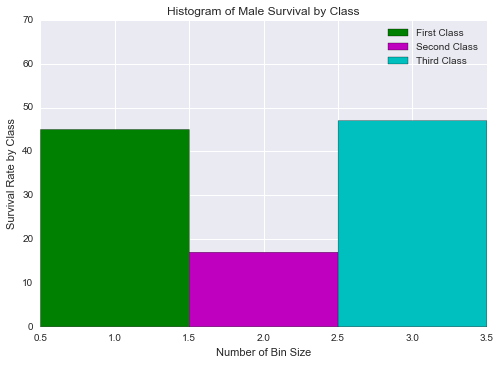

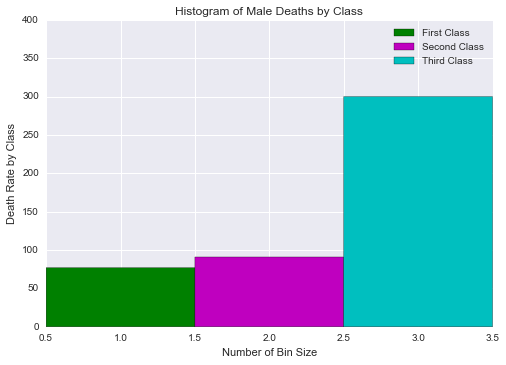

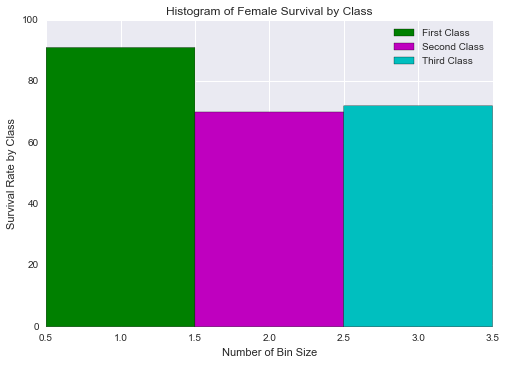

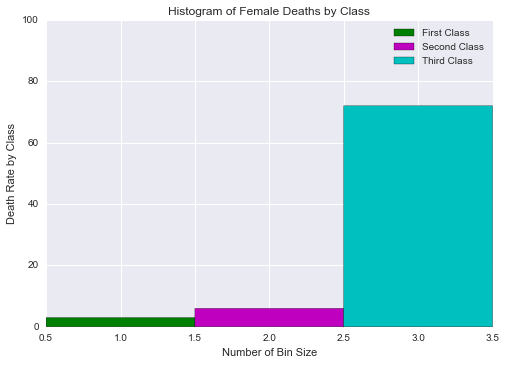

In [17]:
############################## Males #########################

################## Survivied ##########################
#Plot histogram of first_class 
plt.hist(first_class,
         bins=1,
         color='g',
         label='First Class')

#plot histogram of second_class 
plt.hist(second_class,
         bins=1,
         color='m',
         label='Second Class')

#plot histogram of third_class 
plt.hist(third_class, 
         bins=1,
         label='Third Class',
         color='c')

# Set the x and y boundaries of the figure
plt.ylim([0,70])

# Set the title and labels 
plt.title('Histogram of Male Survival by Class')
plt.xlabel('Number of Bin Size')
plt.ylabel('Survival Rate by Class')
plt.legend(loc='upper right')

plt.show()
# the ship cracks in the middle

############################ Victims ####################
#Plot histogram of first_class_death_males
plt.hist(first_class_death_males,
         bins=1,
         color='g',
         label='First Class')

#plot histogram of second_class_death_males 
plt.hist(second_class_death_males,
         bins=1,
         color='m',
         label='Second Class')

#plot histogram of third_class_death_males
plt.hist(third_class_death_males, 
         bins=1,
         label='Third Class',
         color='c')

# Set the x and y boundaries of the figure
plt.ylim([0,400])

# Set the title and labels 
plt.title('Histogram of Male Deaths by Class')
plt.xlabel('Number of Bin Size')
plt.ylabel('Death Rate by Class')
plt.legend(loc='upper right')

plt.show()
# the ship cracks in the middle


############################# Females ########################

################## Survived #####################
#Plot histogram of first_class 
plt.hist(first_class_f,
         bins=1,
         color='g',
         label='First Class')

#plot histogram of second_class 
plt.hist(second_class_f,
         bins=1,
         color='m',
         label='Second Class')

#plot histogram of third_class 
plt.hist(third_class_f, 
         bins=1,
         label='Third Class',
         color='c')

# Set the x and y boundaries of the figure
plt.ylim([0,100])

# Set the title and labels 
plt.title('Histogram of Female Survival by Class')
plt.xlabel('Number of Bin Size')
plt.ylabel('Survival Rate by Class')
plt.legend(loc='upper right')

plt.show()
# the ship cracks in the middle

################ Victims ####################
#Plot histogram of first_class_death_males
plt.hist(first_class_death_females,
         bins=1,
         color='g',
         label='First Class')

#plot histogram of second_class_death_males 
plt.hist(second_class_death_females,
         bins=1,
         color='m',
         label='Second Class')

#plot histogram of third_class_death_males
plt.hist(third_class_death_females, 
         bins=1,
         label='Third Class',
         color='c')

# Set the x and y boundaries of the figure
plt.ylim([0,100])

# Set the title and labels 
plt.title('Histogram of Female Deaths by Class')
plt.xlabel('Number of Bin Size')
plt.ylabel('Death Rate by Class')
plt.legend(loc='upper right')

plt.show()
# the ship cracks in the middle
##############################################################

## Barplot showing average fermale, male survivors and victims by class

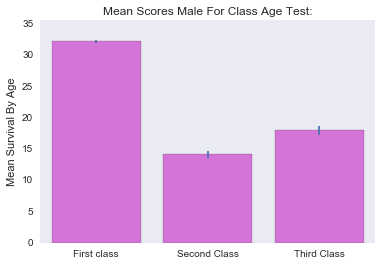

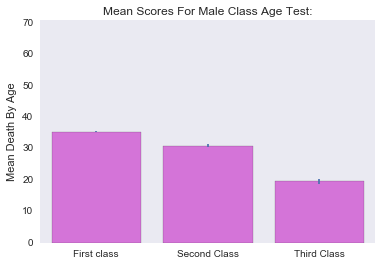

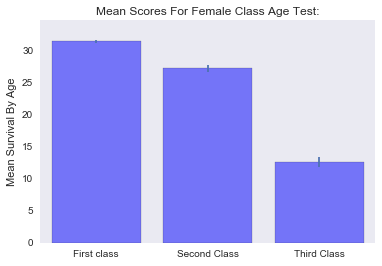

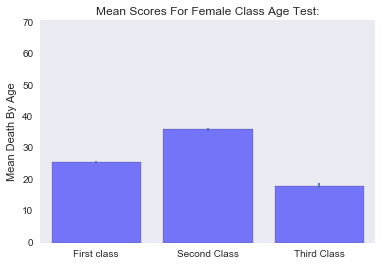

In [324]:
############################################ Male ##########################################

################ Survivors #########################
#create a list of the mean scores for each class 
mean_male_class = [first_class_survived_m['Age'].mean(),second_class_survived_m['Age'].mean(),third_class_survived_m['Age'].mean()]

#create a list of variances, which are set at .25 above and below the score
variance = [first_class.mean()*0.25,second_class.mean()*0.25,third_class.mean()*0.25]

#set the bar labels 
bar_labels = ['First class', 'Second Class', 'Third Class']

#create x position of the bars 
x_pos = list(range(len(bar_labels)))

#create the plot bars
#in x position
plt.bar(x_pos, 
       #using the data from teh mean_male_class
       mean_male_class,
       #with a y-error lines set at variance
       yerr=variance,
       #aligned in the center
       align='center',
       #with color
       color='m',
       #alpha 0.5
       alpha=0.5)
# add a grid 
plt.grid() 

# set heigh of the y-axis 
max_y = max(zip(mean_male_class,variance)) # returns a tuple
plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])

# set axes labels and title
plt.ylabel('Mean Survival By Age')
plt.xticks(x_pos, bar_labels)
plt.title('Mean Scores Male For Class Age Test:')

plt.show()

########### Viticims ###########################
#create a list of the mean scores for each class 
mean_male_death_class = [first_class_death_m['Age'].mean(),second_class_death_m['Age'].mean(),third_class_death_m['Age'].mean()]

#create a list of variances, which are set at .25 above and below the score
variance = [first_class_death_males.mean()*0.25,second_class_death_males.mean()*0.25,third_class_death_males.mean()*0.25]

#set the bar labels 
bar_labels = ['First class', 'Second Class', 'Third Class']

#create x position of the bars 
x_pos = list(range(len(bar_labels)))

#create the plot bars
#in x position
plt.bar(x_pos, 
       #using the data from teh mean_male_class
       mean_male_death_class,
       #with a y-error lines set at variance
       yerr=variance,
       #aligned in the center
       align='center',
       #with color
       color='m',
       #alpha 0.5
       alpha=0.5)
# add a grid 
plt.grid() 

# set heigh of the y-axis 
max_y = max(zip(mean_male_class,variance)) # returns a tuple
plt.ylim([0, (max_y[0] + max_y[0]) * 1.1])

# set axes labels and title
plt.ylabel('Mean Death By Age')
plt.xticks(x_pos, bar_labels)
plt.title('Mean Scores For Male Class Age Test:')

plt.show()

########################################### Female ###################################### 

############ Survivors ##########################
#create a list of the mean scores for each class 
mean_female_class = [first_class_survived_f['Age'].mean(),second_class_survived_f['Age'].mean(),
                     third_class_survived_f['Age'].mean()]

#create a list of variances, which are set at .25 above and below the score
variance = [first_class_f.mean()*0.25,second_class_f.mean()*0.25,third_class_f.mean()*0.25]

#set the bar labels 
bar_labels = ['First class', 'Second Class', 'Third Class']

#create x position of the bars 
x_pos = list(range(len(bar_labels)))

#create the plot bars
#in x position
plt.bar(x_pos, 
       #using the data from teh mean_female_class
       mean_female_class,
       #with a y-error lines set at variance
       yerr=variance,
       #aligned in the center
       align='center',
       #with color
       color='b',
       #alpha 0.5
       alpha=0.5)
# add a grid 
plt.grid() 

# set heigh of the y-axis 
max_y = max(zip(mean_female_class,variance)) # returns a tuple
plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])

# set axes labels and title
plt.ylabel('Mean Survival By Age')
plt.xticks(x_pos, bar_labels)
plt.title('Mean Scores For Female Class Age Test:')

plt.show()

#################### Victims ###################### 
#create a list of the mean scores for each class 
mean_female_death_class = [first_class_death_f['Age'].mean(),second_class_death_f['Age'].mean(),third_class_death_f['Age'].mean()]

#create a list of variances, which are set at .25 above and below the score
variance = [first_class_death_females.mean()*0.25,second_class_death_females.mean()*0.25,third_class_death_females.mean()*0.25]

#set the bar labels 
bar_labels = ['First class', 'Second Class', 'Third Class']

#create x position of the bars 
x_pos = list(range(len(bar_labels)))

#create the plot bars
#in x position
plt.bar(x_pos, 
       #using the data from teh mean_male_class
       mean_female_death_class,
       #with a y-error lines set at variance
       yerr=variance,
       #aligned in the center
       align='center',
       #with color
       color='b',
       #alpha 0.5
       alpha=0.5)
# add a grid 
plt.grid() 

# set heigh of the y-axis 
max_y = max(zip(mean_male_class,variance)) # returns a tuple
plt.ylim([0, (max_y[0] + max_y[0]) * 1.1])

# set axes labels and title
plt.ylabel('Mean Death By Age')
plt.xticks(x_pos, bar_labels)
plt.title('Mean Scores For Female Class Age Test:')

plt.show()


## BarPlot Survived Class and Victim Class Average

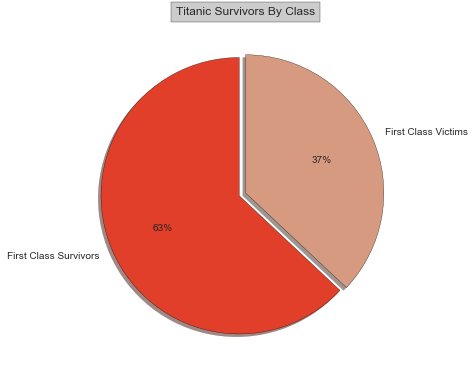

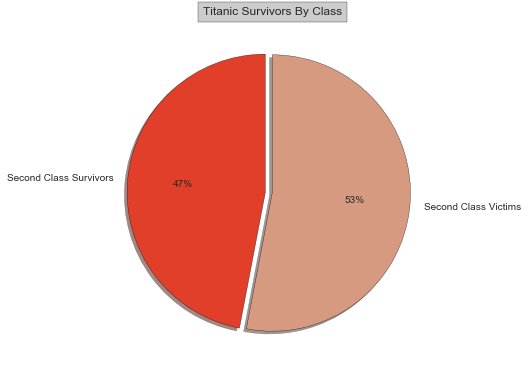

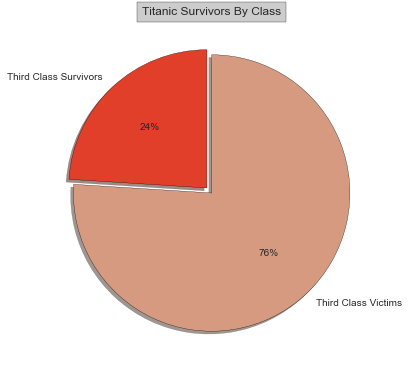

In [325]:
##################### First Class ##########################
# make square figure axes 
figure(1,figsize=(6,6))
ax = axes([0.1,0.1,0.8,0.8])

# The slices will be ordered and plotted counter-clockwise
labels = 'First Class Survivors','First Class Victims'
fracs = [63,37,]
colors = ["#E13F29", "#D69A80"]
explode = (0.05,0)

# Make Pie Chart 
pie(fracs,colors=colors,explode=explode,labels=labels,autopct='%.0f%%',shadow=True,startangle=90)
               
# Make Title 
title('Titanic Survivors By Class', bbox={'facecolor': "0.8", "pad": 5})
show() 

################### Second Class #############################
# make square figure axes 
figure(1,figsize=(6,6))
ax = axes([0.1,0.1,0.8,0.8])

# The slices will be ordered and plotted counter-clockwise
labels = 'Second Class Survivors','Second Class Victims'
fracs = [47,53]
colors = ["#E13F29", "#D69A80"]
explode = (0.05,0)

# Make Pie Chart 
pie(fracs,colors=colors,explode=explode,labels=labels,autopct='%.0f%%',shadow=True,startangle=90)
               
# Make Title 
title('Titanic Survivors By Class', bbox={'facecolor': "0.8", "pad": 5})
show() 

################## Third Class ##############################
# make square figure axes 
figure(1,figsize=(6,6))
ax = axes([0.1,0.1,0.8,0.8])

# The slices will be ordered and plotted counter-clockwise
labels = 'Third Class Survivors','Third Class Victims'
fracs = [24,76]
colors = ["#E13F29", "#D69A80"]
explode = (0.05,0)

# Make Pie Chart 
pie(fracs,colors=colors,explode=explode,labels=labels,autopct='%.0f%%',shadow=True,startangle=90)
               
# Make Title 
title('Titanic Survivors By Class', bbox={'facecolor': "0.8", "pad": 5})
show() 

## Data Wrangling for embarked survivors

In [44]:
#Survivors that embarked at (C = Cherbourg; Q = Queenstown; S = Southampton)
#Try to do some correlation between survivors and where they embarked
embarked_cdf = embarked_survivors(1,'C')
embarked_sdf = embarked_survivors(1,'S')
embarked_qdf = embarked_survivors(1,'Q')

#Deaths that embarked at (C = Cherbourg; Q = Queenstown; S = Southampton)
embarked_death_cdf = embarked_survivors(0,'C')
embarked_death_sdf = embarked_survivors(0,'S')
embarked_death_qdf = embarked_survivors(0,'Q')

#Concat frames of the embarked survivors denoted frames. 
frames = [embarked_cdf, embarked_qdf, embarked_sdf]
embarked_frames = pd.concat(frames)

#Concat frames of the embarked deaths denoted frames. 
frames_death = [embarked_death_cdf,embarked_death_sdf,embarked_death_qdf]
embarked_death_frames = pd.concat(frames_death)

## Scatter plot of Fare of embarked survivors and victims

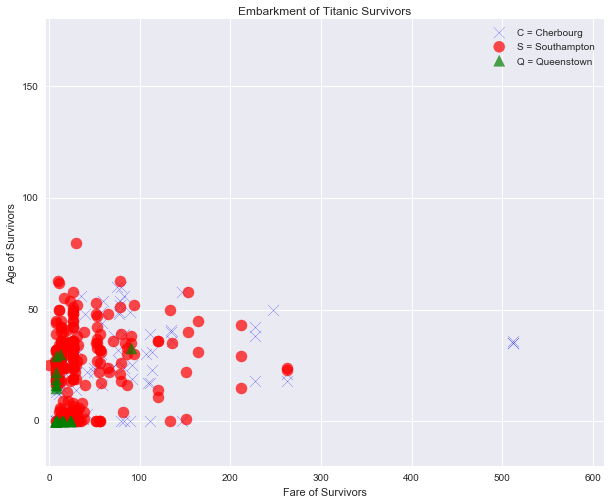

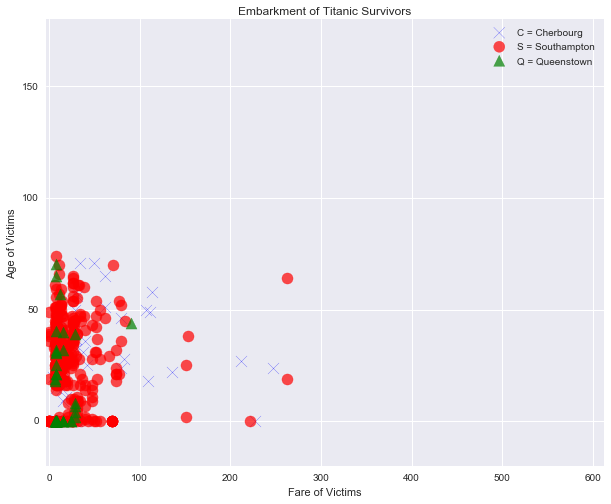

SpearmanrResult(correlation=-0.6880316726256096, pvalue=6.1945537314229761e-126)

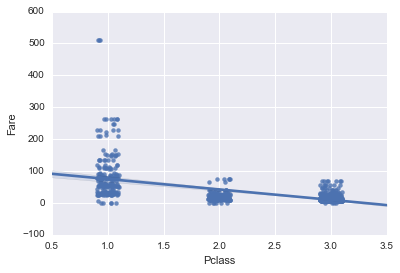

In [380]:
#################### Survivors ############################# 

#Create a figure 
plt.figure(figsize=(10,8))

#Create a scatter plot of where survivors embarked:

            # C embarked as the x axis 
plt.scatter(embarked_cdf['Fare'], 
            # as the y axis
            embarked_cdf['Age'], 
            # the marker as,
            marker = 'x',
            # the color 
            color = 'b',
            # the alpha 
            alpha = 0.7, 
            # with size
            s = 124, 
            # labelled this
            label = 'C = Cherbourg') 

            # S embarked as the x axis
plt.scatter(embarked_sdf['Fare'], 
            # as the y axis
            embarked_sdf['Age'], 
            # the marker as,
            marker = 'o',
            # the color 
            color = 'r',
            # the alpha 
            alpha = 0.7, 
            # with size
            s = 124, 
            # labelled this
            label = 'S = Southampton') 

            # Q embarked as the x axis
plt.scatter(embarked_qdf['Fare'], 
            # as the y axis
            embarked_qdf['Age'], 
            # the marker as,
            marker = '^',
            # the color 
            color = 'g',
            # the alpha 
            alpha = 0.7, 
            # with size
            s = 124, 
            # labelled this
            label = 'Q = Queenstown')

#Chart title 
plt.title('Embarkment of Titanic Survivors')

#y label
plt.ylabel('Age of Survivors')

#x label 
plt.xlabel('Fare of Survivors')

#and a legend 
plt.legend(loc='upper right')

# set the figure boundaries
plt.xlim([min(embarked_qdf['Fare'])-11,max(embarked_cdf['Fare']) + 100])
plt.ylim([min(embarked_qdf['Age'])-20, max(embardked_sdf['Age'])+100])
plt.show()


##################### Vitcims #################################### 
#Create a figure 
plt.figure(figsize=(10,8))

#Create a scatter plot of where survivors embarked:

            # C embarked as the x axis 
plt.scatter(embarked_death_cdf['Fare'], 
            # as the y axis
            embarked_death_cdf['Age'], 
            # the marker as,
            marker = 'x',
            # the color 
            color = 'b',
            # the alpha 
            alpha = 0.7, 
            # with size
            s = 124, 
            # labelled this
            label = 'C = Cherbourg') 

            # S embarked as the x axis
plt.scatter(embarked_death_sdf['Fare'], 
            # as the y axis
            embarked_death_sdf['Age'], 
            # the marker as,
            marker = 'o',
            # the color 
            color = 'r',
            # the alpha 
            alpha = 0.7, 
            # with size
            s = 124, 
            # labelled this
            label = 'S = Southampton') 

            # Q embarked as the x axis
plt.scatter(embarked_death_qdf['Fare'], 
            # as the y axis
            embarked_death_qdf['Age'], 
            # the marker as,
            marker = '^',
            # the color 
            color = 'g',
            # the alpha 
            alpha = 0.7, 
            # with size
            s = 124, 
            # labelled this
            label = 'Q = Queenstown')

#Chart title 
plt.title('Embarkment of Titanic Survivors')

#y label
plt.ylabel('Age of Victims')

#x label 
plt.xlabel('Fare of Victims')

#and a legend 
plt.legend(loc='upper right')

# set the figure boundaries
plt.xlim([min(embarked_qdf['Fare'])-11,max(embarked_cdf['Fare']) + 100])
plt.ylim([min(embarked_qdf['Age'])-20, max(embardked_sdf['Age'])+100])
plt.show()

##################### Spearman Correlation ############## 

# Make Regression plot where x = Class and y = Fare 
sns.regplot(x='Pclass',y='Fare',fit_reg=True,data=titanic_df,x_jitter=.1)

# Perform Spearman Correlation Rank coefficient based on ranke of Class 
scipy.stats.spearmanr(titanic_df['Fare'],titanic_df['Pclass'])

#r_s = -0.69, this shows that there is a negative correlation between Fare and Class. Meaning, 
#as Fare increases class decreases. 


## Metric for embarked Survivors and Deaths

In [53]:
# Describe the embarked data set
embarked_qdf.describe() 
embarked_death_sdf.describe() 

# Find the max and min Fare
embarked_cdf[embarked_cdf['Fare'] == 7.225000]
embarked_cdf[embarked_cdf['Fare'] == 512.329200]
embarked_qdf[embarked_qdf['Fare'] == 7.733300]
embarked_qdf[embarked_qdf['Fare'] == 90.000000]
embarked_death_sdf[embarked_death_sdf['Fare'] == 263]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,30.000000,30.0,30.000000,30.000000,30.000000,30.0,30.000000
mean,319.966667,1.0,2.866667,6.000000,0.300000,0.0,13.182227
std,224.947424,0.0,0.434172,10.718981,0.595963,0.0,15.371167
min,23.000000,1.0,1.000000,0.000000,0.000000,0.0,7.733300
25%,164.500000,1.0,3.000000,0.000000,0.000000,0.0,7.750000
50%,301.500000,1.0,3.000000,0.000000,0.000000,0.0,7.808350
75%,402.000000,1.0,3.000000,11.250000,0.000000,0.0,12.350000
max,829.000000,1.0,3.000000,33.000000,2.000000,0.0,90.000000
